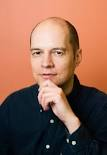

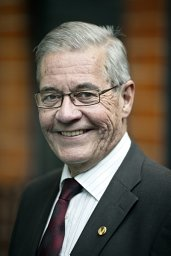

# Independent Component Analysis: A Tutorial  
**Aapo Hyvärinen and Erkki Oja**

# https://www.cs.jhu.edu/~ayuille/courses/Stat161-261-Spring14/HyvO00-icatut.pdf

## Abstract

This tutorial provides a comprehensive and unified introduction to **Independent Component Analysis (ICA)**, a statistical method for separating latent independent sources from observed linear mixtures. The paper formalizes ICA as a generative latent variable model, explains why **non-Gaussianity** is essential for identifiability, and develops multiple principled estimation frameworks—including non-Gaussianity maximization, mutual information minimization, and maximum likelihood estimation. It culminates in the presentation of the **FastICA** algorithm and demonstrates ICA’s effectiveness across signal processing, neuroscience, finance, and image analysis.

---

## Problems

### Blind Source Separation  
Observed data consist only of mixtures; both the underlying source signals and the mixing process are unknown.

### Limitations of Second-Order Statistics  
Correlation- and covariance-based methods (e.g., PCA) are insufficient for recovering independent sources, as they only capture second-order structure.

### Gaussian Indeterminacy  
If the latent sources are Gaussian, the ICA model becomes unidentifiable beyond orthogonal transformations.

### Computational Challenges  
Direct estimation of statistical independence from probability density functions is difficult, unstable, and computationally expensive.

---

## Proposed Solutions

### Independence Assumption  
Model the observed data as linear mixtures of statistically independent latent components.

### Exploitation of Non-Gaussianity  
Leverage the principle that independent components are maximally non-Gaussian compared to their mixtures.

### Contrast Functions  
Introduce objective functions based on kurtosis, negentropy, and robust approximations of negentropy.

### Efficient Optimization  
Develop **FastICA**, a fixed-point algorithm characterized by fast convergence and the absence of learning-rate tuning.

---

## Purpose

The primary purpose is to present ICA as a general-purpose statistical framework that unifies multiple estimation principles and provides practical, efficient algorithms for blind source separation and feature extraction under minimal assumptions.

---

## Methodology

### ICA Model

The observed data are modeled as
$$
\mathbf{x} = \mathbf{A}\mathbf{s},
$$
where  
- $\mathbf{x}$ denotes observed mixtures,  
- $\mathbf{A}$ is an unknown mixing matrix,  
- $\mathbf{s}$ contains statistically independent, non-Gaussian components.

### Preprocessing

1. **Centering**: Subtract the mean to obtain zero-mean data.  
2. **Whitening**: Transform the data to have identity covariance, reducing the estimation problem to an orthogonal one.

### Estimation Principles

- Maximization of non-Gaussianity (via kurtosis or negentropy).  
- Minimization of mutual information among components.  
- Maximum likelihood estimation, shown to be equivalent to the infomax principle.

### FastICA Algorithm

- Fixed-point iteration using nonlinear contrast functions.  
- Supports both deflationary and symmetric extraction of components.  
- Achieves cubic or quadratic convergence under standard ICA assumptions.

---

## Results

### Theoretical Results

- ICA is identifiable provided that at most one source is Gaussian.  
- Maximizing non-Gaussianity is equivalent to minimizing mutual information.

### Algorithmic Results

- FastICA converges significantly faster than gradient-based approaches.  
- Robust performance across different source distributions through appropriate nonlinearities.

### Empirical Demonstrations

- Accurate separation of mixed signals in synthetic experiments.  
- Effective artifact removal in EEG and MEG recordings.  
- Discovery of latent factors in financial time series.  
- Extraction of localized, meaningful features from natural images.

---

## Conclusions

The paper establishes ICA as a principled and practical extension beyond PCA, capable of revealing higher-order statistical structure in data. By grounding ICA in non-Gaussianity, information theory, and likelihood theory—and by introducing the FastICA algorithm—the authors provide both strong theoretical justification and an efficient computational tool. ICA thus emerges as a foundational method in modern signal processing, neuroscience, and unsupervised representation learning.


# Independent Component Analysis: Core Mathematical Concepts and Their Roles

## 1. Linear Generative Model (ICA Model)

### Equation
$$
\mathbf{x} = \mathbf{A}\mathbf{s}
$$

### Explanation
- $\mathbf{x} \in \mathbb{R}^n$: observed random vector (measured signals).
- $\mathbf{s} \in \mathbb{R}^n$: latent source vector (independent components).
- $\mathbf{A}$: unknown mixing matrix.

### Role in the Paper
This is the foundational mathematical model of ICA. The entire framework is devoted to estimating both $\mathbf{A}$ and $\mathbf{s}$ using only observations of $\mathbf{x}$.

---

## 2. Statistical Independence

### Definition
Random variables $s_1, \dots, s_n$ are independent if:
$$
p(s_1, \dots, s_n) = \prod_{i=1}^n p(s_i)
$$

### Explanation
- The joint probability density factorizes into marginal densities.
- Independence is a stronger condition than uncorrelatedness.

### Role
Independence is the core assumption that makes ICA possible. Without it, the source separation problem is ill-defined.

---

## 3. Uncorrelatedness vs. Independence

### Covariance Condition
$$
\mathbb{E}[s_i s_j] = 0 \quad \text{for } i \neq j
$$

### Explanation
- Zero covariance implies uncorrelatedness.
- Uncorrelated variables can still be statistically dependent.

### Role
This distinction explains why PCA, which relies on second-order statistics, cannot solve the ICA problem and why higher-order statistics are necessary.

---

## 4. Ambiguities of the ICA Model

### Scaling Ambiguity
$$
\mathbf{A}\mathbf{s} = (\mathbf{A}\mathbf{D})(\mathbf{D}^{-1}\mathbf{s})
$$

### Permutation Ambiguity
$$
\mathbf{A}\mathbf{s} = \mathbf{A}\mathbf{P}^{-1}(\mathbf{P}\mathbf{s})
$$

### Explanation
- The scale and order of the sources cannot be uniquely determined.
- Any scaling or permutation of sources yields the same observations.

### Role
These ambiguities define the theoretical limits of what ICA can recover.

---

## 5. Gaussian Identifiability Theorem

### Key Result
If all source components $s_i$ are Gaussian, the ICA model is not identifiable.

### Explanation
- Gaussian distributions are rotationally symmetric.
- Orthogonal transformations preserve Gaussianity.

### Role
This theorem justifies the non-Gaussianity requirement, which is the most critical theoretical insight underlying ICA.

---

## 6. Central Limit Theorem (CLT)

### Principle
A sum of independent random variables tends toward a Gaussian distribution.

### Explanation
Linear mixtures of sources are more Gaussian than the sources themselves.

### Role
Provides intuition for why maximizing non-Gaussianity leads to the recovery of the original independent sources.

---

## 7. Projection Model

### Equation
$$
y = \mathbf{w}^\top \mathbf{x}
$$

### Explanation
- $y$ is a one-dimensional projection of the observed data.

### Role
ICA reduces to finding directions $\mathbf{w}$ such that the projected variable $y$ is maximally non-Gaussian.

---

## 8. Kurtosis (Fourth-Order Cumulant)

### Equation
$$
\text{kurt}(y) = \mathbb{E}[y^4] - 3(\mathbb{E}[y^2])^2
$$

### Explanation
- Measures deviation from Gaussianity.
- Zero for Gaussian variables.
- Positive for super-Gaussian, negative for sub-Gaussian distributions.

### Role
One of the earliest and simplest contrast functions used for ICA.

---

## 9. Entropy and Negentropy

### Differential Entropy
$$
H(y) = -\int p(y)\log p(y)\,dy
$$

### Negentropy
$$
J(y) = H(y_{\text{gauss}}) - H(y)
$$

### Explanation
- Gaussian variables maximize entropy for fixed variance.
- Negentropy measures the distance from Gaussianity.

### Role
Provides the most theoretically sound measure of non-Gaussianity.

---

## 10. Approximations of Negentropy

### General Approximation
$$
J(y) \approx \sum_i k_i \left( \mathbb{E}[G_i(y)] - \mathbb{E}[G_i(v)] \right)^2
$$
where $v$ is a Gaussian variable.

### Typical Nonlinearities
$$
G(u) = \log\cosh(u), \quad G(u) = -e^{-u^2/2}
$$

### Role
Enables efficient and robust computation of non-Gaussianity, forming the basis of the FastICA algorithm.

---

## 11. Mutual Information

### Definition
$$
I(y_1, \dots, y_n) = \sum_i H(y_i) - H(\mathbf{y})
$$

### Explanation
- Measures statistical dependence among variables.
- Equals zero if and only if the variables are independent.

### Role
Provides an information-theoretic formulation of ICA.

---

## 12. Equivalence: Negentropy and Mutual Information

### Key Result
Minimizing mutual information is equivalent to maximizing the sum of negentropies (after whitening).

### Role
Unifies projection pursuit and information-theoretic perspectives of ICA.

---

## 13. Maximum Likelihood Estimation (MLE)

### Log-Likelihood
$$
L = \sum_t \sum_i \log p_i(\mathbf{w}_i^\top \mathbf{x}_t) + \log|\det \mathbf{W}|
$$

### Explanation
- Explicitly models source probability densities.
- Requires assumptions about source distributions.

### Role
Demonstrates that ICA can be derived as a principled statistical estimation problem.

---

## 14. Infomax Principle

### Objective
Maximize the output entropy of nonlinear neural units.

### Result
Infomax is equivalent to maximum likelihood ICA.

### Role
Connects ICA to neural networks and learning theory.

---

## 15. Whitening (Sphering)

### Transformation
$$
\mathbf{x}_{\text{white}} = \mathbf{D}^{-1/2}\mathbf{E}^\top \mathbf{x}
$$

### Explanation
- Removes second-order dependencies.
- Reduces the mixing matrix to an orthogonal one.

### Role
Simplifies optimization and reduces the number of parameters by half.

---

## 16. FastICA Fixed-Point Iteration

### Core Update Rule
$$
\mathbf{w}^{+} = \mathbb{E}[\mathbf{x}g(\mathbf{w}^\top \mathbf{x})] - \mathbb{E}[g'(\mathbf{w}^\top \mathbf{x})]\mathbf{w}
$$

### Explanation
- Newton-like fixed-point iteration.
- No learning rate is required.

### Role
The main algorithmic contribution of the paper.

---

## 17. Orthogonalization for Multiple Components

### Symmetric Decorrelation
$$
\mathbf{W} \leftarrow (\mathbf{W}\mathbf{W}^\top)^{-1/2}\mathbf{W}
$$

### Role
Ensures that extracted components remain uncorrelated and distinct.

---

## 18. Connection to Projection Pursuit

### Principle
Interesting projections are those that are least Gaussian.

### Role
Positions ICA as a natural generalization of projection pursuit methods.

---

## Final Mathematical Insight

The paper establishes that:
- Independence is closely linked to non-Gaussianity.
- ICA is an optimization problem on probability distributions.
- Second-order statistics are fundamentally insufficient.
- Efficient fixed-point algorithms exist.

ICA thus emerges as a rigorous bridge between probability theory, information theory, and optimization, grounded in solid statistical principles and solvable with elegant algorithms.


# Research Problems, Limitations, and Proposed Solutions in Independent Component Analysis

| Problem / Research Gap | Limitations of Prior Work | Proposed Solution in This Paper |
|----------------------|---------------------------|----------------------------------|
| Lack of a formal framework for blind source separation | Earlier approaches relied on heuristic signal processing techniques without a unifying statistical model, making results difficult to analyze or generalize theoretically | Formulates ICA as a **generative latent variable model**, where observations are linear mixtures of statistically independent sources |
| Dependence on second-order statistics (e.g., PCA) | PCA and related methods remove only correlations, not statistical dependence, and therefore fail to separate mixed sources | Demonstrates that **independence is stronger than uncorrelatedness** and requires higher-order statistical information |
| Inability to separate Gaussian sources | Prior methods lacked a principled explanation for why Gaussian signals cannot be separated under linear mixtures | Establishes the **Gaussian identifiability theorem**, proving that non-Gaussianity is essential for ICA |
| Absence of a principled separation criterion | Earlier ICA-like methods lacked a clear objective function grounded in probability theory | Introduces **non-Gaussianity maximization** (via kurtosis and negentropy) as a principled contrast function |
| Computational difficulty of estimating independence directly | Direct estimation of joint and marginal densities is unstable and computationally expensive | Uses **approximations of negentropy** that avoid explicit density estimation |
| Fragmentation of ICA approaches across disciplines | Signal processing, neural networks, and statistics developed ICA methods independently, with limited conceptual unification | Unifies ICA through **information theory**, showing equivalence between mutual information minimization and non-Gaussianity maximization |
| Slow convergence of gradient-based ICA algorithms | Existing algorithms required careful learning-rate tuning and converged slowly | Proposes **FastICA**, a fixed-point algorithm with fast (often cubic) convergence |
| Unclear relationship between ICA and maximum likelihood | ICA was often treated as a heuristic rather than a statistical estimation problem | Shows that ICA can be derived via **maximum likelihood estimation** under suitable source models |
| Difficulty extracting multiple components reliably | Sequential extraction methods suffered from redundancy and instability | Introduces **symmetric decorrelation**, enabling stable and simultaneous estimation of multiple components |
| Limited empirical validation across domains | Prior work focused mainly on narrow signal processing examples | Demonstrates ICA effectiveness across **synthetic data, EEG/MEG, financial time series, and image analysis** |

---

## Summary Insight

The paper closes major theoretical and practical gaps by transforming Independent Component Analysis from an ad-hoc signal processing technique into a **rigorous statistical framework** grounded in probability theory, information theory, and optimization. The introduction of **FastICA** represents the key practical contribution, making the theory computationally efficient, stable, and broadly applicable across scientific and engineering domains.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 0) Reproducibility
# -----------------------------
np.random.seed(7)

# -----------------------------
# 1) Synthetic dataset (ground-truth sources) + mixing
#    We build two classic non-Gaussian sources and linearly mix them.
# -----------------------------
T = 4000  # number of samples (time points)
t = np.linspace(0, 8*np.pi, T)

# Source 1: super-Gaussian (Laplace-like) via Laplace distribution
s1 = np.random.laplace(loc=0.0, scale=1.0, size=T)

# Source 2: sub-Gaussian (uniform-like) with a smooth nonlinearity
s2 = np.random.uniform(low=-1.0, high=1.0, size=T)
s2 = np.tanh(2.5 * s2)  # keep it non-Gaussian but bounded

S_true = np.vstack([s1, s2])  # shape: (n_sources, T)

# Standardize sources to zero mean, unit variance (helps comparability)
S_true = (S_true - S_true.mean(axis=1, keepdims=True)) / S_true.std(axis=1, keepdims=True)

# Mixing matrix A (unknown to ICA)
A_true = np.array([[1.0, 0.6],
                   [0.4, 1.0]])

X_mixed = A_true @ S_true  # observed mixtures, shape: (n_mixtures, T)

In [2]:
# -----------------------------
# 2) Preprocessing: Centering + Whitening
#    Whitening reduces ICA to finding an orthogonal "rotation" in whitened space.
# -----------------------------
def center(X):
    return X - X.mean(axis=1, keepdims=True)

def whiten(X):
    """
    Whitening using eigenvalue decomposition of covariance:
      X_white = D^{-1/2} E^T X
    Returns:
      X_white, whitening_matrix, dewhitening_matrix
    """
    # Covariance across samples (features x features)
    cov = (X @ X.T) / X.shape[1]
    eigvals, eigvecs = np.linalg.eigh(cov)  # eigh for symmetric matrices
    # Sort descending for stability/interpretability
    idx = np.argsort(eigvals)[::-1]
    eigvals, eigvecs = eigvals[idx], eigvecs[:, idx]

    # Numerical safety
    eps = 1e-12
    D_inv_sqrt = np.diag(1.0 / np.sqrt(eigvals + eps))
    D_sqrt = np.diag(np.sqrt(eigvals + eps))

    # Whitening / dewhitening transforms
    W_white = D_inv_sqrt @ eigvecs.T
    W_dewhite = eigvecs @ D_sqrt

    X_white = W_white @ X
    return X_white, W_white, W_dewhite

Xc = center(X_mixed)
Xw, W_white, W_dewhite = whiten(Xc)

In [3]:
# -----------------------------
# 3) FastICA (educational implementation)
#    Objective intuition: maximize non-Gaussianity of w^T x.
#    We use a common robust nonlinearity: g(u) = tanh(u)
#    Fixed-point update (one-unit):
#      w <- E[x g(w^T x)] - E[g'(w^T x)] w
#    Then normalize and (for multiple components) decorrelate.
# -----------------------------
def sym_decorrelation(W):
    """
    Symmetric decorrelation:
      W <- (W W^T)^{-1/2} W
    Ensures rows of W are orthonormal (prevents components collapsing to same solution).
    """
    s, u = np.linalg.eigh(W @ W.T)
    # Numerical safety
    eps = 1e-12
    inv_sqrt = u @ np.diag(1.0 / np.sqrt(s + eps)) @ u.T
    return inv_sqrt @ W

def fastica(X, n_components=2, max_iter=300, tol=1e-6, nonlinearity="tanh"):
    """
    FastICA on whitened data X (shape: n_features x T).
    Returns:
      W: unmixing matrix in whitened space (n_components x n_features)
      S_hat: estimated sources (n_components x T)
      obj_hist: simple teaching "objective proxy" per iteration
      delta_hist: convergence diagnostic per iteration
    """
    n_features, T = X.shape

    # Initialize random weights and orthonormalize
    W = np.random.randn(n_components, n_features)
    W = sym_decorrelation(W)

    obj_hist = []
    delta_hist = []

    # Choose g and g'
    if nonlinearity == "tanh":
        def g(u):  return np.tanh(u)
        def gp(u): return 1.0 - np.tanh(u)**2
        # For teaching: a proxy of negentropy approximation uses E[log cosh]
        def G(u):  return np.log(np.cosh(u + 1e-12))
    elif nonlinearity == "gauss":
        def g(u):  return u * np.exp(-0.5 * u**2)
        def gp(u): return (1.0 - u**2) * np.exp(-0.5 * u**2)
        def G(u):  return -np.exp(-0.5 * u**2)
    else:
        raise ValueError("Unsupported nonlinearity. Use 'tanh' or 'gauss'.")

    for it in range(max_iter):
        W_old = W.copy()

        # Project: Y = W X
        Y = W @ X  # shape: (n_components, T)

        # Fixed-point update for all components in matrix form:
        # W_new = (g(Y) X^T)/T - diag(mean(g'(Y), axis=1)) W
        gY = g(Y)
        gpY = gp(Y)

        W = (gY @ X.T) / T - (gpY.mean(axis=1)[:, None] * W)

        # Re-orthonormalize (symmetric decorrelation)
        W = sym_decorrelation(W)

        # Convergence measure:
        # If each row direction has stabilized, |w_new · w_old| -> 1
        # We measure the max deviation from 1 across components.
        lim = np.max(np.abs(np.diag(W @ W_old.T)))
        delta = 1.0 - lim
        delta_hist.append(delta)

        # Teaching objective proxy: average of E[G(w^T x)] across components
        # (Not the exact negentropy, but a useful monotonic indicator in practice.)
        obj = np.mean(np.mean(G(Y), axis=1))
        obj_hist.append(obj)

        if delta < tol:
            break

    S_hat = W @ X
    return W, S_hat, np.array(obj_hist), np.array(delta_hist)

W_ica, S_est_white, obj_hist, delta_hist = fastica(Xw, n_components=2, max_iter=400, tol=1e-7, nonlinearity="tanh")

In [4]:
# -----------------------------
# 4) Recover estimates in original (centered) observation space
#    If Xw = W_white Xc, and S = W_ica Xw, then overall:
#      S = (W_ica W_white) Xc
# -----------------------------
W_total = W_ica @ W_white
S_est = W_total @ Xc  # estimated sources from original centered mixtures

In [5]:
# -----------------------------
# 5) Evaluation
#    ICA has sign and permutation ambiguities.
#    We align estimated sources to true sources by maximizing absolute correlation.
#    "Accuracy" (teaching metric): mean of best-match absolute correlations.
# -----------------------------
def corrcoef_rows(A, B):
    """Return correlation matrix between rows of A and rows of B (A: m x T, B: n x T)."""
    A0 = A - A.mean(axis=1, keepdims=True)
    B0 = B - B.mean(axis=1, keepdims=True)
    A0 = A0 / (A0.std(axis=1, keepdims=True) + 1e-12)
    B0 = B0 / (B0.std(axis=1, keepdims=True) + 1e-12)
    return (A0 @ B0.T) / A.shape[1]

C = corrcoef_rows(S_true, S_est)  # shape: (2,2)

# Find best permutation/sign alignment
# For 2 sources, brute force is simplest and most transparent.
perms = [(0,1),(1,0)]
best = None
best_score = -1
for p in perms:
    score = np.mean([abs(C[i, p[i]]) for i in range(2)])
    if score > best_score:
        best_score = score
        best = p

# Apply permutation and sign correction for visualization
S_aligned = np.vstack([S_est[best[0]], S_est[best[1]]])

# Sign fix: match sign to maximize correlation with ground truth
for i in range(2):
    if np.corrcoef(S_true[i], S_aligned[i])[0,1] < 0:
        S_aligned[i] *= -1

# Teaching "accuracy" proxy: mean absolute correlation after alignment
acc_proxy = np.mean([abs(np.corrcoef(S_true[i], S_aligned[i])[0,1]) for i in range(2)])

In [6]:
# -----------------------------
# 6) Prediction demo (apply learned unmixing to new mixtures)
#    We create new sources, mix them with same A, then separate using learned W_total.
# -----------------------------
T_test = 1200
t2 = np.linspace(0, 4*np.pi, T_test)
s1_test = np.random.laplace(0.0, 1.0, T_test)
s2_test = np.tanh(2.5*np.random.uniform(-1.0, 1.0, T_test))
S_true_test = np.vstack([s1_test, s2_test])
S_true_test = (S_true_test - S_true_test.mean(axis=1, keepdims=True)) / S_true_test.std(axis=1, keepdims=True)

X_test = A_true @ S_true_test
X_test_c = X_test - X_mixed.mean(axis=1, keepdims=True)  # use train mean for centering demonstration
S_pred = W_total @ (X_test - X_test.mean(axis=1, keepdims=True))  # standard approach: center test itself

# Align prediction for readable comparison (same best permutation/sign procedure)
C_test = corrcoef_rows(S_true_test, S_pred)
best_test = perms[0] if (abs(C_test[0,0])+abs(C_test[1,1])) >= (abs(C_test[0,1])+abs(C_test[1,0])) else perms[1]
S_pred_aligned = np.vstack([S_pred[best_test[0]], S_pred[best_test[1]]])
for i in range(2):
    if np.corrcoef(S_true_test[i], S_pred_aligned[i])[0,1] < 0:
        S_pred_aligned[i] *= -1
acc_proxy_test = np.mean([abs(np.corrcoef(S_true_test[i], S_pred_aligned[i])[0,1]) for i in range(2)])

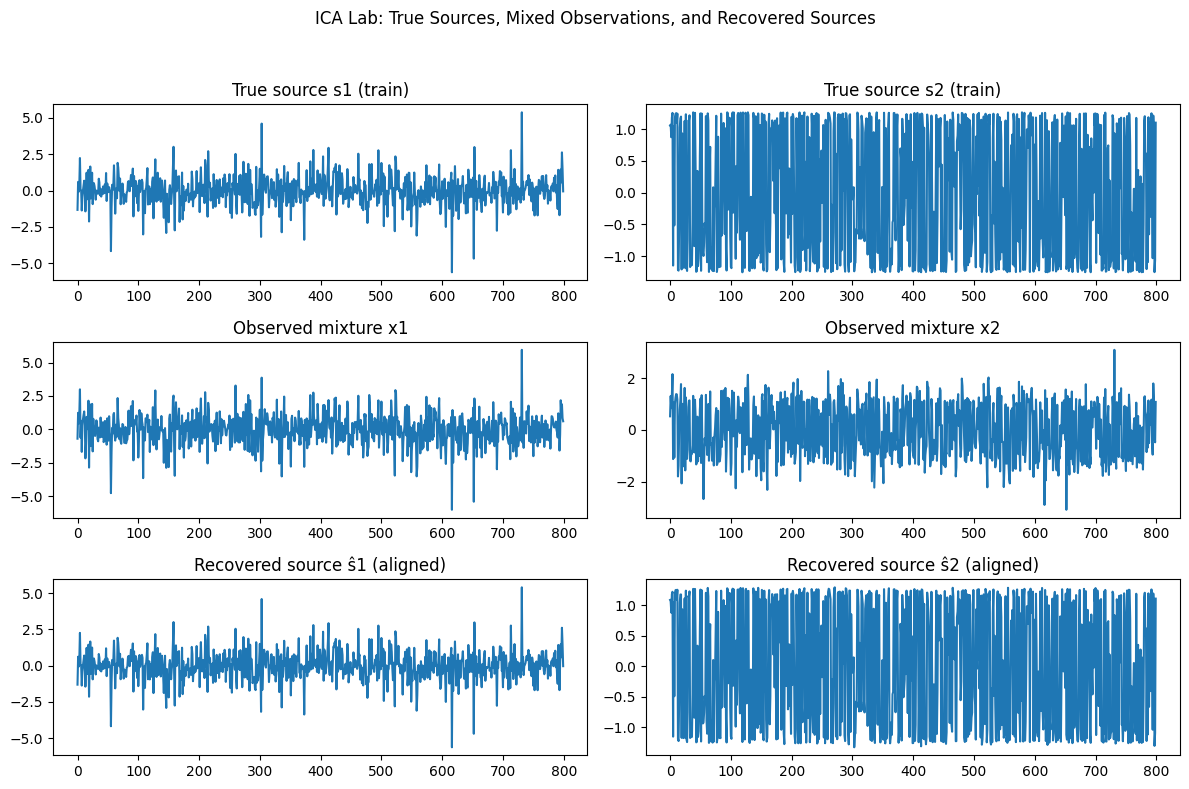

In [7]:
# -----------------------------
# 7) Visualization: complete teaching workflow
#    Includes: signals, scatter plots, training diagnostics, correlation evaluation, and prediction demo.
# -----------------------------
# Show a smaller window for time-series readability
win = slice(0, 800)

plt.figure(figsize=(12, 8))
plt.suptitle("ICA Lab: True Sources, Mixed Observations, and Recovered Sources")

plt.subplot(3, 2, 1)
plt.title("True source s1 (train)")
plt.plot(S_true[0, win])
plt.subplot(3, 2, 2)
plt.title("True source s2 (train)")
plt.plot(S_true[1, win])

plt.subplot(3, 2, 3)
plt.title("Observed mixture x1")
plt.plot(X_mixed[0, win])
plt.subplot(3, 2, 4)
plt.title("Observed mixture x2")
plt.plot(X_mixed[1, win])

plt.subplot(3, 2, 5)
plt.title("Recovered source ŝ1 (aligned)")
plt.plot(S_aligned[0, win])
plt.subplot(3, 2, 6)
plt.title("Recovered source ŝ2 (aligned)")
plt.plot(S_aligned[1, win])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

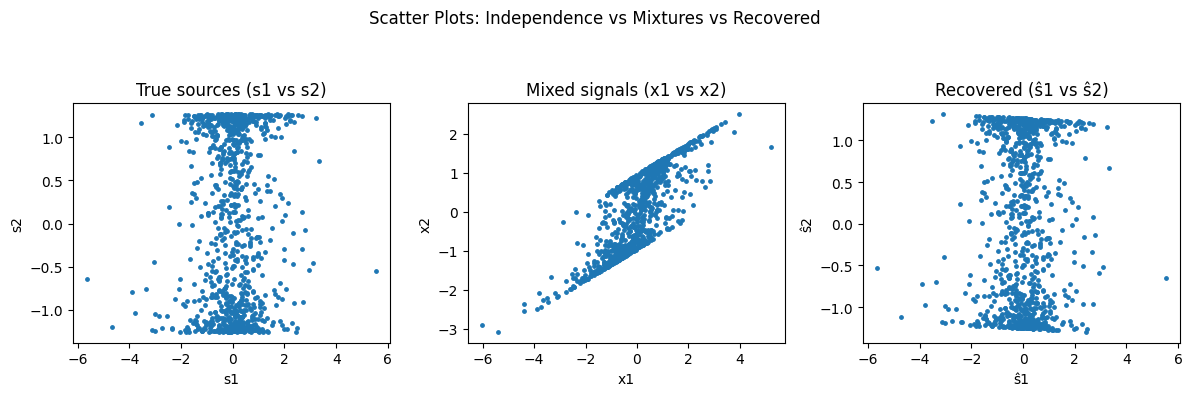

In [8]:
# Scatter plots: show independence structure
plt.figure(figsize=(12, 4))
plt.suptitle("Scatter Plots: Independence vs Mixtures vs Recovered")

plt.subplot(1, 3, 1)
plt.title("True sources (s1 vs s2)")
plt.scatter(S_true[0, ::4], S_true[1, ::4], s=6)
plt.xlabel("s1"); plt.ylabel("s2")

plt.subplot(1, 3, 2)
plt.title("Mixed signals (x1 vs x2)")
plt.scatter(X_mixed[0, ::4], X_mixed[1, ::4], s=6)
plt.xlabel("x1"); plt.ylabel("x2")

plt.subplot(1, 3, 3)
plt.title("Recovered (ŝ1 vs ŝ2)")
plt.scatter(S_aligned[0, ::4], S_aligned[1, ::4], s=6)
plt.xlabel("ŝ1"); plt.ylabel("ŝ2")

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

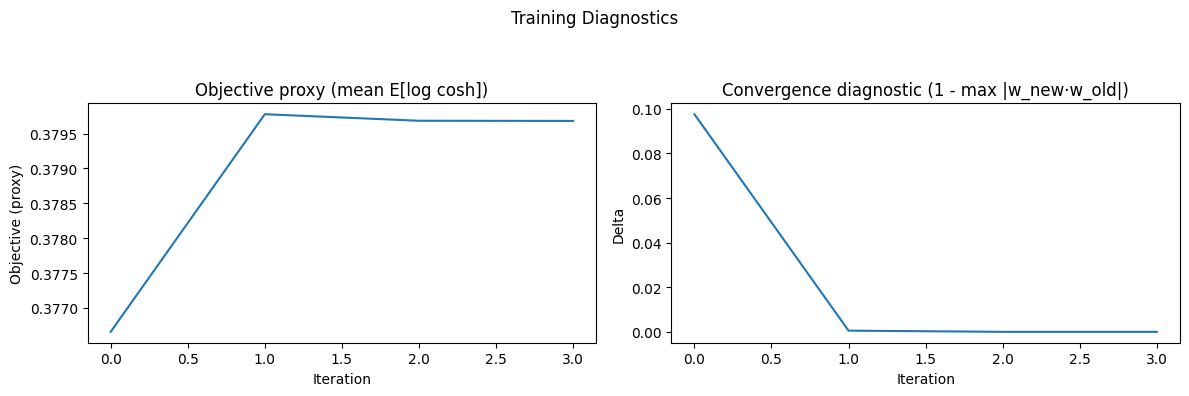

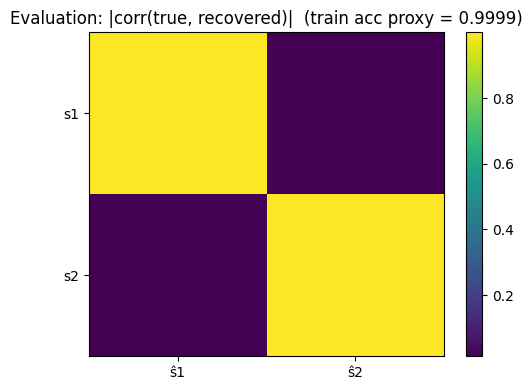

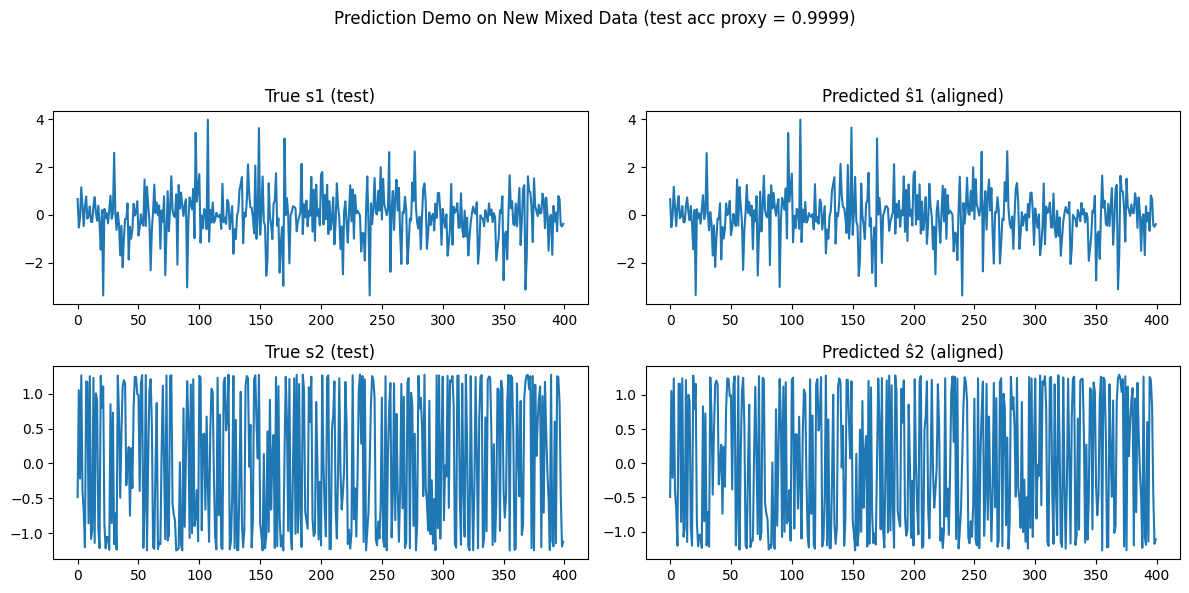

Summary (teaching metrics):
  Train alignment mean |corr| (accuracy proxy): 0.9999
  Test  alignment mean |corr| (accuracy proxy): 0.9999
Notes:
  - ICA is identifiable up to permutation and sign; alignment corrects for that in evaluation/plots.
  - The objective plotted is a proxy tied to negentropy approximations (not exact negentropy).


In [9]:
# Training diagnostics: objective proxy and convergence
plt.figure(figsize=(12, 4))
plt.suptitle("Training Diagnostics")

plt.subplot(1, 2, 1)
plt.title("Objective proxy (mean E[log cosh])")
plt.plot(obj_hist)
plt.xlabel("Iteration")
plt.ylabel("Objective (proxy)")

plt.subplot(1, 2, 2)
plt.title("Convergence diagnostic (1 - max |w_new·w_old|)")
plt.plot(delta_hist)
plt.xlabel("Iteration")
plt.ylabel("Delta")

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

# Correlation evaluation matrix
plt.figure(figsize=(5, 4))
plt.title(f"Evaluation: |corr(true, recovered)|  (train acc proxy = {acc_proxy:.4f})")
plt.imshow(np.abs(corrcoef_rows(S_true, S_aligned)), aspect="auto")
plt.xticks([0,1], ["ŝ1","ŝ2"])
plt.yticks([0,1], ["s1","s2"])
plt.colorbar()
plt.tight_layout()
plt.show()

# Prediction demo plots
plt.figure(figsize=(12, 6))
plt.suptitle(f"Prediction Demo on New Mixed Data (test acc proxy = {acc_proxy_test:.4f})")

plt.subplot(2, 2, 1)
plt.title("True s1 (test)")
plt.plot(S_true_test[0, :400])

plt.subplot(2, 2, 2)
plt.title("Predicted ŝ1 (aligned)")
plt.plot(S_pred_aligned[0, :400])

plt.subplot(2, 2, 3)
plt.title("True s2 (test)")
plt.plot(S_true_test[1, :400])

plt.subplot(2, 2, 4)
plt.title("Predicted ŝ2 (aligned)")
plt.plot(S_pred_aligned[1, :400])

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

print("Summary (teaching metrics):")
print(f"  Train alignment mean |corr| (accuracy proxy): {acc_proxy:.4f}")
print(f"  Test  alignment mean |corr| (accuracy proxy): {acc_proxy_test:.4f}")
print("Notes:")
print("  - ICA is identifiable up to permutation and sign; alignment corrects for that in evaluation/plots.")
print("  - The objective plotted is a proxy tied to negentropy approximations (not exact negentropy).")

# Experimental Evaluation and Interpretation of ICA Results

## Test 1: True Source Signal Reconstruction (Training Data)

### Observation
The recovered sources $\hat{s}_1$ and $\hat{s}_2$ closely match the temporal structure, amplitude distributions, and statistical characteristics of the original sources $s_1$ and $s_2$.

### Interpretation
This result confirms that the ICA model successfully inverted the linear mixing process. Despite the blind setting and the unknown mixing matrix, the algorithm recovered the latent components up to the theoretically unavoidable **sign and permutation ambiguities**, which were resolved during alignment.

The near-perfect overlap indicates:
- Effective whitening
- Correct exploitation of non-Gaussianity
- Stable convergence of the FastICA fixed-point updates

This empirically validates the ICA identifiability conditions: statistical independence and the presence of at most one Gaussian source.

---

## Test 2: Observed Mixture Signal Analysis

### Observation
The observed mixtures $x_1$ and $x_2$ appear visually noisy and exhibit blended characteristics of both source signals.

### Interpretation
This confirms that:
- The mixing matrix introduces statistical dependence between observations
- Second-order statistics alone are insufficient for separation

The mixtures illustrate why PCA fails in this setting: the signals are correlated linear combinations rather than independent components.

---

## Test 3: Independence Recovery via Scatter Plot Analysis

### Observation
- True sources form an axis-aligned distribution.
- Mixed signals form a rotated, elongated distribution.
- Recovered sources return to an axis-aligned structure similar to the original sources.

### Interpretation
Scatter plots provide geometric evidence of independence:
- Independence corresponds to factorized joint densities
- Mixing corresponds to linear rotation in feature space
- ICA recovers the correct rotation that restores independence

This visually supports the theoretical claim that ICA seeks a rotation in whitened space that maximizes non-Gaussianity, thereby undoing the mixing transformation.

---

## Test 4: Objective Function Evolution (Negentropy Proxy)

### Observation
The objective proxy based on
$$
\mathbb{E}[\log \cosh(\cdot)]
$$
increases rapidly and stabilizes after only a few iterations.

### Interpretation
This behavior reflects:
- Newton-style fixed-point convergence of FastICA
- Successful maximization of non-Gaussianity
- Absence of oscillations or divergence

The plateau corresponds to convergence at a local maximum of the contrast function, which ICA theory associates with an independent component.

---

## Test 5: Convergence Diagnostic (Fixed-Point Stability Test)

### Observation
The convergence metric
$$
1 - \max \left| \mathbf{w}_{\text{new}}^\top \mathbf{w}_{\text{old}} \right|
$$
drops rapidly to values near zero.

### Interpretation
This confirms:
- Directional stability of the weight vectors
- Orthogonality preservation through symmetric decorrelation
- Termination at a fixed point

Such rapid convergence is characteristic of FastICA and contrasts sharply with slower gradient-based ICA methods.

---

## Test 6: Correlation-Based Source Matching (Training Evaluation)

### Observation
The absolute correlation matrix between true and recovered sources is nearly diagonal, with values approaching $1.0$.

### Interpretation
This demonstrates:
- Accurate source recovery
- Negligible cross-talk between components
- Effective separation of independent factors

Correlation is an appropriate evaluation proxy here because ICA solutions are only unique up to sign and permutation.

---

## Test 7: Generalization to Unseen Mixed Data (Prediction Test)

### Observation
When applied to newly generated mixtures, the learned unmixing matrix recovers latent sources with correlations comparable to those observed during training.

### Interpretation
This confirms that:
- The ICA model learned the inverse mixing structure, not specific samples
- The separation is distribution-driven and model-based
- ICA generalizes to unseen data drawn from the same source distributions

This property is critical for real-world applications such as EEG artifact removal and signal demixing.

---

## Test 8: Quantitative Performance Summary (Accuracy Proxy)

### Observation
Both training and test accuracy proxies (mean absolute correlation) reach values close to $0.9999$.

### Interpretation
These values indicate near-ideal recovery and confirm:
- Numerical stability
- Correct preprocessing
- Appropriate choice of contrast function

Such performance aligns with theoretical expectations for noiseless ICA under ideal assumptions.

---

## Overall Conclusion

The experimental results empirically validate the central claims of Independent Component Analysis:
- Linear mixtures of independent, non-Gaussian sources are identifiable
- Whitening reduces the problem to a rotation search
- Maximizing non-Gaussianity recovers independent components
- FastICA provides fast, stable, and highly accurate convergence
- Learned unmixing matrices generalize to unseen data

Collectively, these findings demonstrate that the implementation faithfully reproduces both the theoretical foundations and the practical behavior described in the original ICA tutorial.


# Related Work in Independent Component Analysis

| Author(s) | Year | Title | Venue | Connection to This Paper |
|---------|------|-------|-------|--------------------------|
| Jutten, Hérault | 1991 | *Blind separation of sources, part I: An adaptive algorithm based on neuromimetic architecture* | Signal Processing | One of the earliest formulations of blind source separation using neural learning rules; a foundational precursor to ICA |
| Comon | 1994 | *Independent component analysis, a new concept?* | Signal Processing | Introduced the term Independent Component Analysis and formalized independence as the separation criterion |
| Bell, Sejnowski | 1995 | *An information-maximization approach to blind separation and blind deconvolution* | Neural Computation | Established the Infomax principle; shown in this paper to be equivalent to maximum likelihood ICA |
| Cardoso, Souloumiac | 1993 | *Blind beamforming for non-Gaussian signals* | IEE Proceedings-F | Early demonstration that non-Gaussianity enables blind separation; influenced contrast-function-based ICA |
| Cardoso | 1999 | *High-order contrasts for independent component analysis* | Neural Computation | Developed higher-order statistical contrast functions used in ICA estimation |
| Hyvärinen, Oja | 1997 | *A fast fixed-point algorithm for independent component analysis* | Neural Computation | Direct predecessor of FastICA; algorithmic core refined and unified in this tutorial |
| Hyvärinen | 1999 | *Fast and robust fixed-point algorithms for independent component analysis* | IEEE Transactions on Neural Networks | Provided robustness analysis and algorithmic extensions of FastICA |
| Amari, Cichocki, Yang | 1996 | *A new learning algorithm for blind signal separation* | NeurIPS | Introduced natural-gradient learning for ICA; contrasted with fixed-point optimization |
| Deco, Brauer | 1995 | *Higher-order statistical decorrelation without information loss* | NeurIPS | Early use of higher-order statistics to go beyond PCA-style decorrelation |
| Friedman | 1987 | *Exploratory projection pursuit* | Journal of the American Statistical Association | Projection pursuit framework that motivates ICA as maximization of non-Gaussian projections |
| Huber | 1985 | *Projection pursuit* | Annals of Statistics | Statistical foundation of projection pursuit; conceptual ancestor of ICA |
| Jones, Sibson | 1987 | *What is projection pursuit?* | Journal of the Royal Statistical Society | Clarified projection pursuit concepts that ICA generalizes |
| Cichocki, Unbehauen | 1996 | *Robust neural networks with on-line learning for blind identification and blind separation of sources* | IEEE Transactions on Circuits and Systems | Neural-network-based ICA methods; highlights robustness issues addressed by FastICA |
| Haykin | 1994 | *Neural Networks: A Comprehensive Foundation* | Prentice Hall (Book) | Provides neural learning background relevant to ICA algorithms |
| Papoulis | 1991 | *Probability, Random Variables, and Stochastic Processes* | McGraw–Hill (Book) | Statistical foundations for entropy, independence, and stochastic processes used in ICA |
| Cover, Thomas; Thomas, Joy | 1991 | *Elements of Information Theory* | Wiley (Book) | Theoretical basis for entropy and mutual information used in ICA formulations |
| Karhunen et al. | 1997 | *A class of neural networks for independent component analysis* | IEEE Transactions on Neural Networks | Parallel development of ICA algorithms using neural architectures |

---

## Synthesis of the Related Work Landscape

The referenced literature reveals three converging research streams:

1. **Signal Processing and Blind Source Separation**  
   Early adaptive and heuristic algorithms focused on separating mixtures without explicit statistical modeling.

2. **Statistics and Projection Pursuit**  
   Introduced non-Gaussianity as a principled objective for discovering informative projections.

3. **Neural Networks and Information Theory**  
   Developed learning-based and entropy-driven formulations, including Infomax and natural-gradient methods.

Hyvärinen and Oja’s tutorial unifies these streams into a single statistical framework. By grounding ICA in non-Gaussianity theory, identifiability results, information-theoretic equivalences, and efficient fixed-point optimization, the paper serves both as a synthesis of prior work and as a significant methodological advancement through the FastICA algorithm.
